In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
def Permutation(n, k):
    num = 1
    for i in range(k):
        num*=(n-i)
        
    return num

In [7]:
Permutation(9, 4)

3024

In [8]:
def Combination(n, k):
    num = 1
    for i in range(k):
        num*=((n-i)/(k-i))
        
    return num

In [9]:
Combination(9,4)

126.0

### Random variable

A variable that can take more than one value in a range and its value cannot be known in advance before measuring it.

### Discrete Variables

The variable takes values from a list of values.

### Continuous Variables

The variable takes any value from a range, such as [0-10], values can be anything, 4.12 or 7/3 or 5.00.

### Probability Distribution

Discrete random variables have probability distributions.

In [10]:
Temperature = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Probability = [0.03, 0.05, 0.06, 0.09, 0.12, 0.2, 0.18, 0.14, 0.08, 0.03, 0.02]
OctoberTProb = pd.DataFrame({"Temperature": Temperature, "Probability": Probability})
OctoberTProb

,Temperature,Probability
0,5,0.03
1,6,0.05
2,7,0.06
3,8,0.09
4,9,0.12
5,10,0.20
6,11,0.18
7,12,0.14
8,13,0.08
9,14,0.03


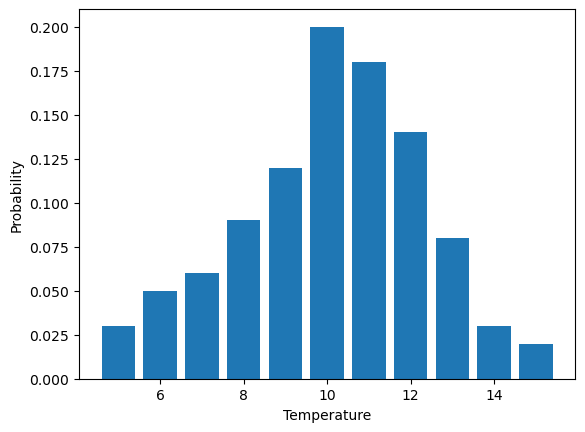

In [12]:
plt.bar(Temperature, Probability)
plt.xlabel("Temperature")
plt.ylabel("Probability")
plt.show()

### Mean of a Probability of Distribution

Also called *population mean* or *expected value*

In [13]:
np.sum(OctoberTProb.Temperature*OctoberTProb.Probability)

10.090000000000002

### Population Variance

In [14]:
Sigma_2 = np.sum(((OctoberTProb.Temperature-10)**2)*OctoberTProb.Probability)
Sigma_2

5.01

In [15]:
st_dev = np.sqrt(Sigma_2)
st_dev

2.238302928559939

### Cumulative-Distribution Function

In [17]:
OctoberTProb["Cumulative Probability"] = np.cumsum(OctoberTProb.Probability)
OctoberTProb

,Temperature,Probability,Cumulative Probability
0,5,0.03,0.03
1,6,0.05,0.08
2,7,0.06,0.14
3,8,0.09,0.23
4,9,0.12,0.35
5,10,0.20,0.55
6,11,0.18,0.73
7,12,0.14,0.87
8,13,0.08,0.95
9,14,0.03,0.98


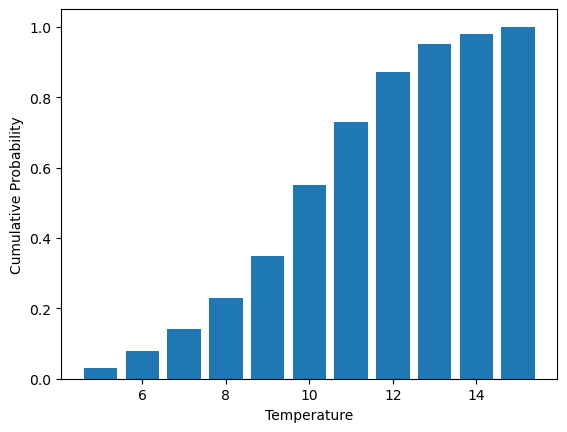

In [18]:
plt.bar(OctoberTProb.Temperature, OctoberTProb["Cumulative Probability"])
plt.xlabel("Temperature")
plt.ylabel("Cumulative Probability")
plt.show()

### Bernoulli Distribution

A bernoulli trial has two possible outcomes:
1 or 0, Yes or No, Success or Failure

Tossing a coin: P(Tails) = 0.5, P(Heads) = 0.5
Cancer diagnosis: P(Cancer) = 0.01, P(No cancer) = 0.99
GC content of DNA: P(GC) = 0.4, P(AT) = 0.6

Simplest of the discrete distributions is Bernoulli distribution.
It is the outcome of one Bernoulli trial.

In [34]:
p = 0.4 # GC content
q = 0.6

string = "GACGT" # or its complementary "CTGCA"

def SingleBernoulliGC(p, q, string):
    num = 1
    for i in string:
        if i == "G" or i == "C":
            num*=p
        elif i == "A" or i == "T":
            num*=q
        else:
            print("Fatal Error!!!")
            
    return num

In [35]:
SingleBernoulliGC(p, q, string)

0.02304

### Combinations of 3p and 2q

In [36]:
def Permutation(n):
    num = 1
    for i in range(n):
        num*=(n-i)
        
    return num

In [37]:
Permutation(5)

120

In [40]:
def Combination(n, k):
    return Permutation(n)/(Permutation(k)*Permutation(n-k))

In [41]:
Combination(5, 3)

10.0

In [42]:
SingleBernoulliGC(p, q, string)*Combination(len(string), (string.count("G")+string.count("C")))

0.23040000000000002

### Generalized Bernoulli Combinations  / Binomial Distribution

Probability that it will have exactly set constant GC pairs and remaining AT pairs.

Probability of success is p,
Probability of failure is q=1-p,
Probability of having k successes in the n independent trials is:

P(k) = Combination(n|k)*(p^k)((1-p)^(n-k))

It is bi-nomial because there are only two possible outcomes.

In [45]:
def Binomial(n, k, p):
    return Combination(n, k)*(p**k)*((1-p)**(n-k))

In [46]:
Binomial(5, 3, 0.4)

0.23040000000000005

In [47]:
Binomial(10, 4, 0.3)

0.2001209489999999

In [48]:
Dist = []

for i in range(11):
    Dist.append(Binomial(10, i, 0.3))

<BarContainer object of 11 artists>

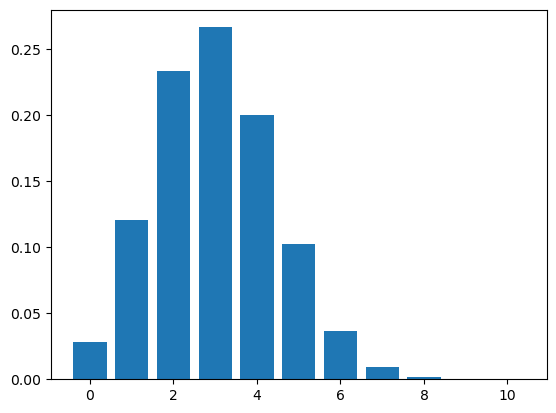

In [51]:
plt.bar(list(range(11)), Dist)

### Expected Value of Binomial Distribution

n*p

### Mean of Binomial Distribution

n*p

### Variance of Binomial Distribution

n*p*q

In [52]:
Binomial(3, 2, 0.2)

0.09600000000000003

### Multinomial Distribution

If we wanted to calculate probability of finding the following a.a sequence in humans: **APYTYRAA**. 
There are 20 types of a.as in human proteins.

For this a.a list we have **3As**, **2Ys**, **1P**, **1T**, **1R**

Each of the a.as have a different p, such as **p(A) = 0.05**, **p(Y) = 0.1**
Sum of p's for all amino acids = 1

P = (Per(8)/(Per(3)*Per(2)*Per(1)*Per(1)*Per(1)))*(p(A)^3)*(p(Y)^2)*p(P)*p(T)*p(R)
Multinomial Distribution

### Distribution of Rare Events: Poisson

We know G binds to C, A binds to T.
But rarely, enzymes make a mistake, and G or C get bound to A or T.

Let's assume that probability of that mistake is 1 in a million: p=1e-6=0.000001

Rather than looking for number of successes in n trials, lets ask:
How many base pairs will it take until we find a mistake?

How many trials do we need to find one "success"?

p = 1e-6, q = 1 - 1e-6

P for finding exactly one mistake in 2 trials:

P(X=1) = (1e-6)*(1-(1e-6)) + (1-(1e-6))*(1e-6) ~= 2e-6

For finding k successes in n trials:
P(X=k) = Combination(n k)(p^k)((1-p)^(n-k))

Replace with μ = np
P(X=k) = Combination(n k)((μ/n)^k)((1 - μ/n)^(n-k))

P(X=k) = (e^(-μ) * u^k)/Per(k) -> Poisson distribution
Some sources use λ instead of μ.

a = μ = λt = pn

Expected value of Poisson distribution is μ
Variance of Poisson distribution is also μ

In [59]:
def Poisson(u, k):
    return (math.e**(-u))*(u**k)/Permutation(k)

### Example

In Turkey, lets assume that there are 1 million university students. And there are 1000 Erasmus Students.

What is the probability of finding 2 Erasmus Students in a classroom of 20 students?

p = 1000/1M = 0.001
n = 20
μ = np = 0.001*20 = 0.02

In [61]:
Poisson(0.02, 2)

0.00019603973466135105

In [62]:
Dist1 = []

for i in range(11):
    Dist1.append(Poisson(0.02, i))

<BarContainer object of 11 artists>

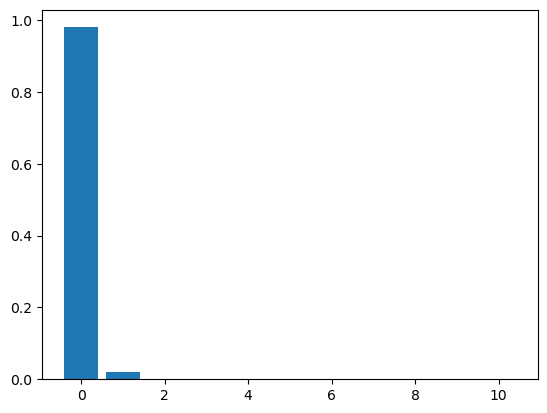

In [63]:
plt.bar(list(range(11)), Dist1)